# WRG: Weapon Recoil Generation

## 1. 좌표 값 생성 함수 설계

In [ ]:
import numpy as np

def generate_segmented_recoil(shots):
    x = []
    y = []

    for i in range(1, shots + 1):
        # 초탄
        if i <= int(shots/3):
            dx = np.random.normal(0.1, 0.05)        # 약간의 X축 흔들림 부여
            dy = np.random.uniform(0.3, 0.5)        # 세로 반동 (조금 줄임)
        # 중탄
        elif i <= int((shots/3)*2):
            dx = np.random.normal(0.3, 0.25)        # X축 미세 흔들림 증가
            dy = np.random.normal(0.3, 0.3)
        # 후탄
        else:
            dx = np.random.uniform(-1, 1)           # X축 흔들림 강함
            dy = np.random.normal(0.05, 0.02)       # Y축 거의 없음

        x.append(dx)
        y.append(dy)

    x_cum = np.cumsum(x)
    y_cum = np.cumsum(y)

    return x_cum, y_cum

## 2. 데이터 증강 및 저장 함수 설계

In [46]:
import json

def generate_recoil_dataset(shots):
    recoil_dataset = []
    for i in range(100):
        x, y = generate_segmented_recoil(shots)
        dataset = [{'x': float(xi), 'y': float(yi)} for xi, yi in zip(x, y)]
        recoil_dataset.append({
            f'INDEX': i,
            'DATA': dataset
        })

    with open ("data/recoil_segmented_dataset.json", "w", encoding="utf-8") as f:
        json.dump(recoil_dataset, f, indent=2, ensure_ascii=False)

    print("'recoil_segmented_dataset.json' 파일로 저장 완료되었습니다.")

    return x, y

## 3. 시각화 함수 설계

In [41]:
import matplotlib.pyplot as plt

def plot_recoil_pattern(x, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(x, y, c='red', s=10, marker='s')  # y축 반전해서 위로 튀는 느낌
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.gca().set_facecolor('white')
    plt.grid(True, linestyle=':', color='grey', alpha=0.3)
    plt.xticks(np.arange(-10, 10, 1))
    plt.yticks(np.arange(-10, 10, 1))
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.gca().set_aspect('equal')
    plt.title("Improved Recoil Pattern (30 shots)", color='black')
    plt.tick_params(colors='black')
    plt.tight_layout()
    plt.show()

## 4. 사용 예시

'recoil_segmented_dataset.json' 파일로 저장 완료되었습니다.


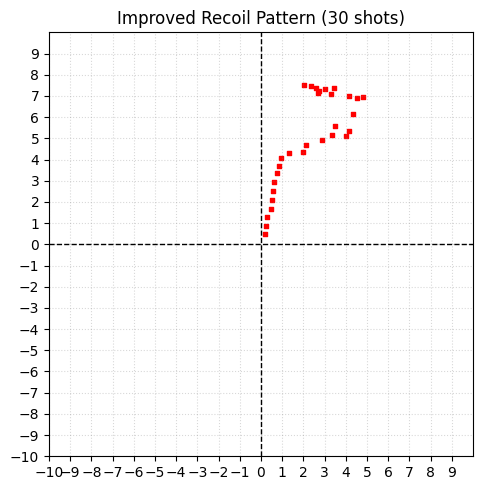

In [52]:
x, y = generate_recoil_dataset(30)
plot_recoil_pattern(x, y)